# Let's fit a model on the housing price data!
1. Import packages
2. Load Data
3. Fit a LR model


# Import Packages

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [ ]:
#Raw data training set import
raw_data_train = pd.read_csv('https://raw.githubusercontent.com/jmpark0808/pl_mnist_example/main/train_hp_msci436.csv')
raw_data_train.tail()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


# EDA

In [ ]:
#data import of main dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jmpark0808/pl_mnist_example/main/train_hp_msci436.csv')

### Assign columns/ Data preprocessing

In [ ]:
cols = df.columns

#columns which were removed after initial inspection of columns due to being of low relevance to sale price (theoretical)
unwanted_cols = ['LotShape', 'LandContour', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
                 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinF1', 'BsmtFinSF2', 'HeatingQC', 'LowQualFinSF',
                 'KitchenQual', 'Functional', 'GarageQual', 'GarageCond']

num_cols = df._get_numeric_data().columns

cat_cols = list(set(cols) - set(num_cols)-set(unwanted_cols))

df[cat_cols] = df[cat_cols].fillna('NA')
df[num_cols] = df[num_cols].fillna(df.mean())

raw_data_train[cat_cols] = raw_data_train[cat_cols].fillna('NA')
raw_data_train[num_cols] = raw_data_train[num_cols].fillna(raw_data_train.mean())


<ipython-input-14-4f1c0f9db64d>:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[num_cols] = df[num_cols].fillna(df.mean())
<ipython-input-14-4f1c0f9db64d>:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_data_train[num_cols] = raw_data_train[num_cols].fillna(raw_data_train.mean())


### Plot num and cat columns against SalePrice for Feature Selection

---



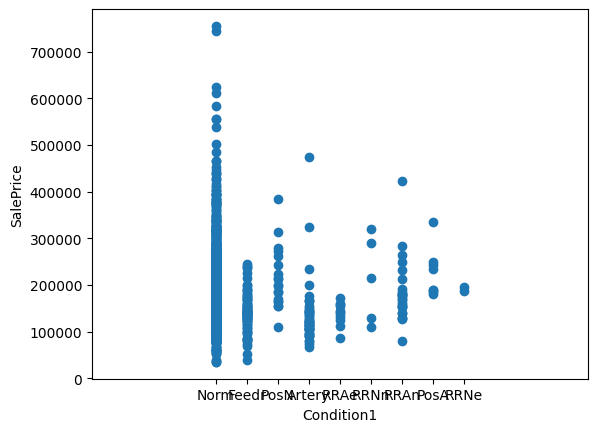

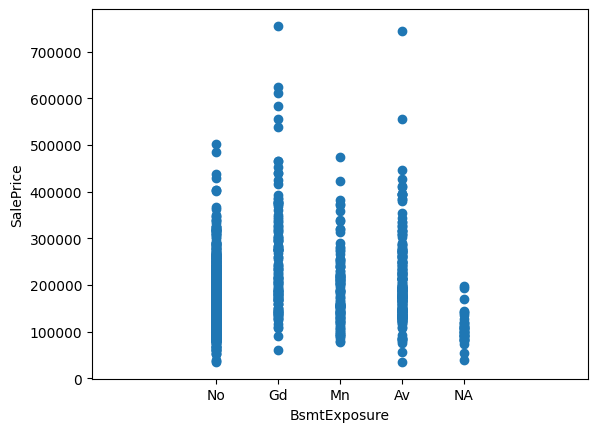

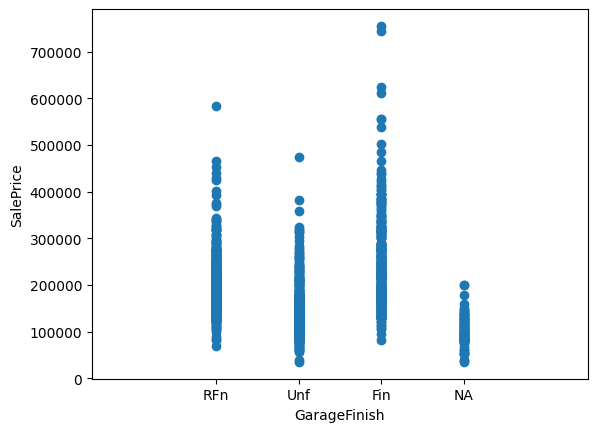

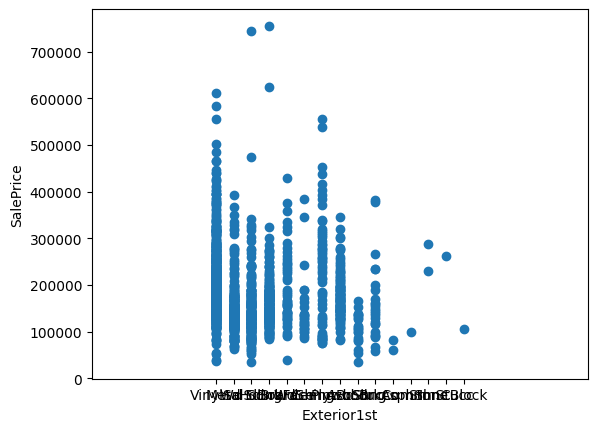

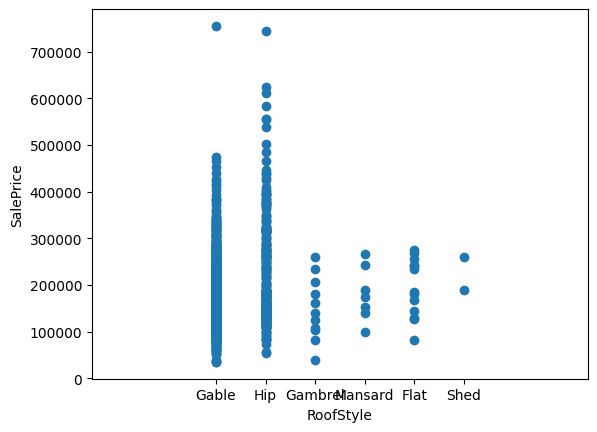

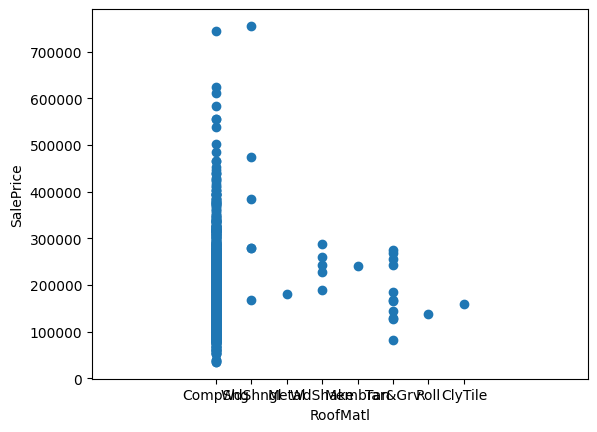

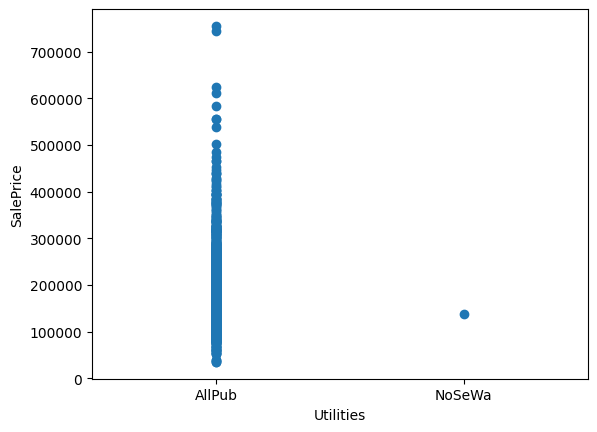

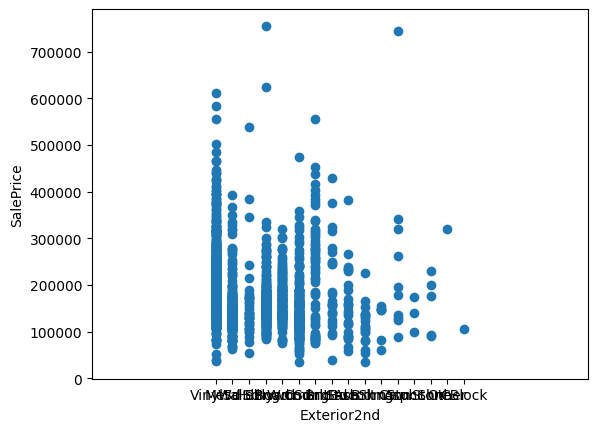

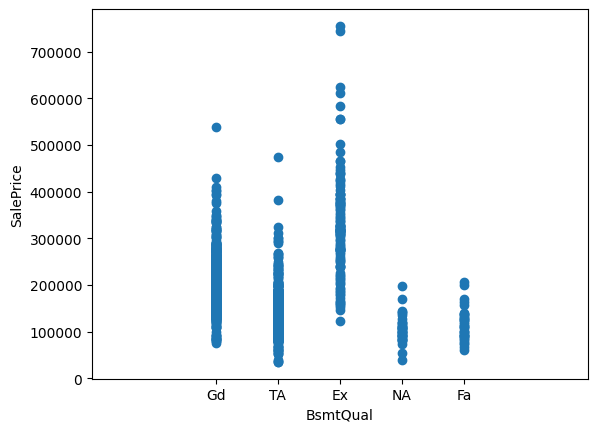

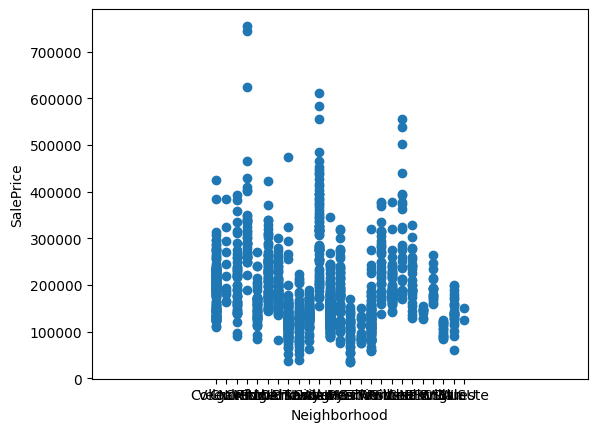

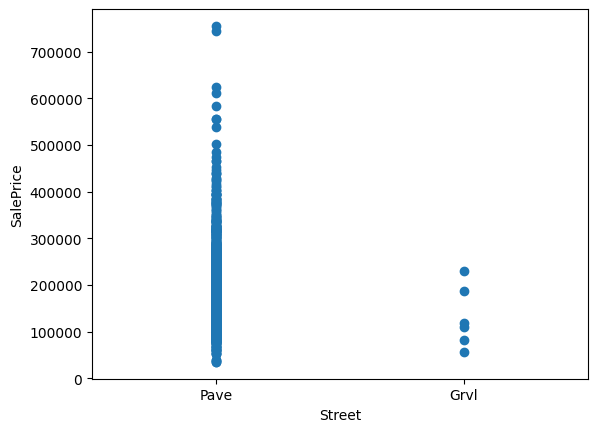

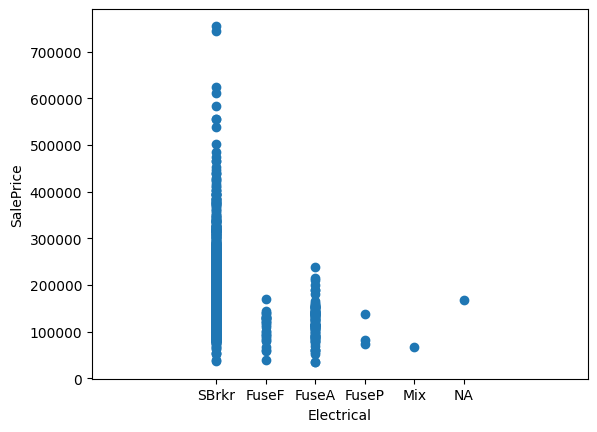

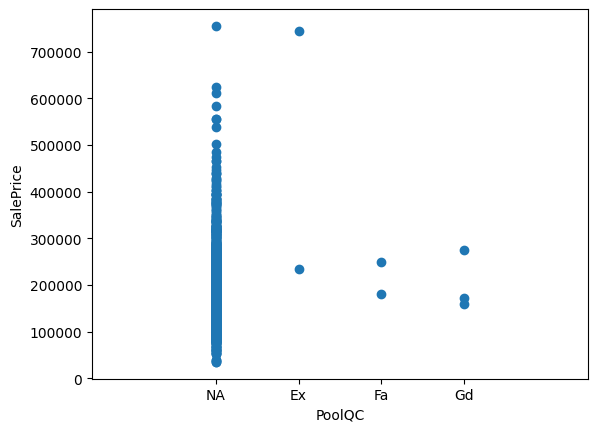

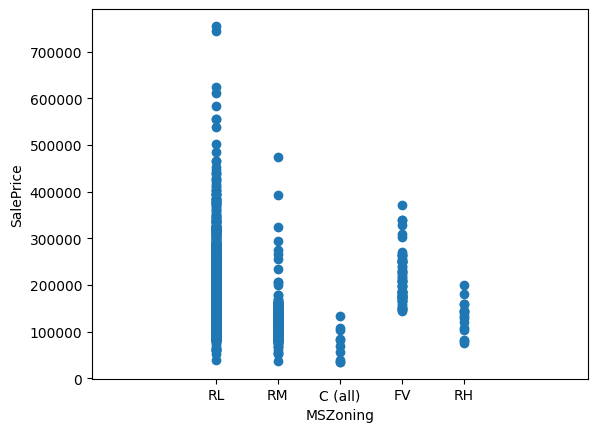

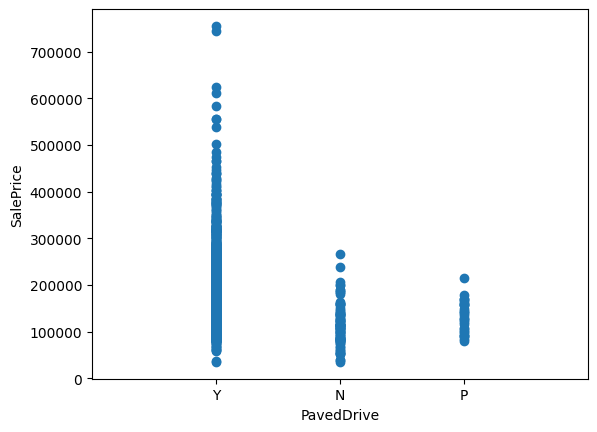

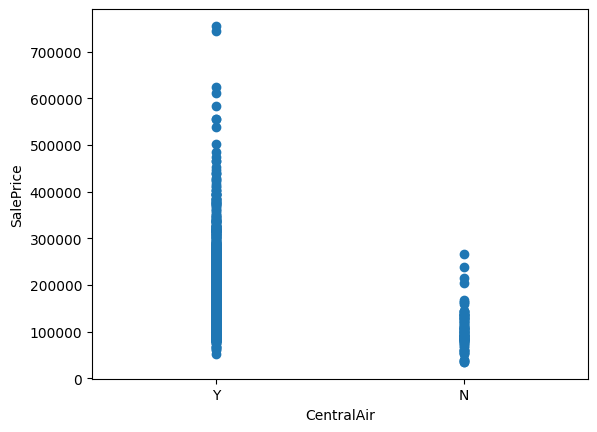

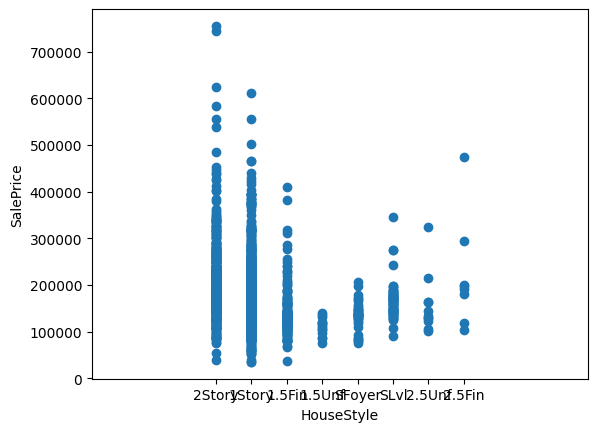

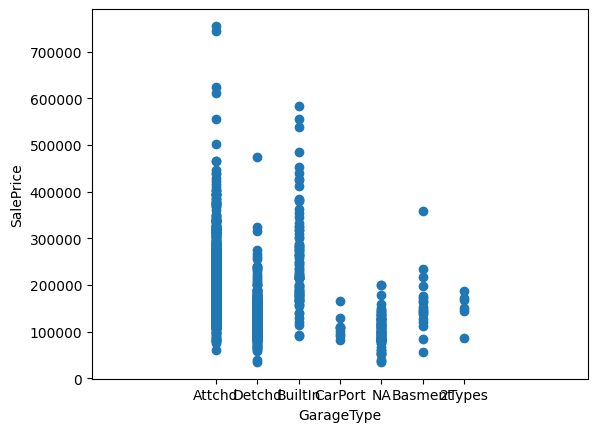

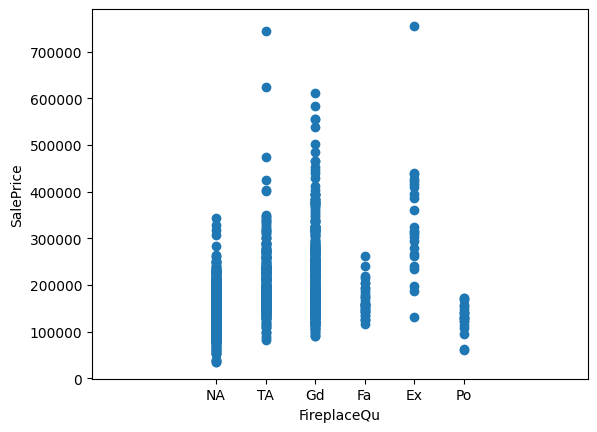

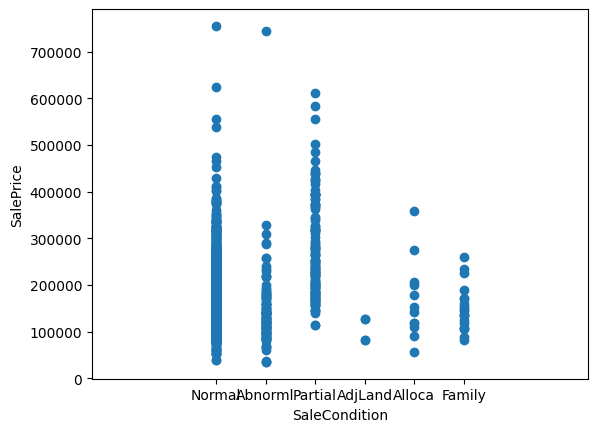

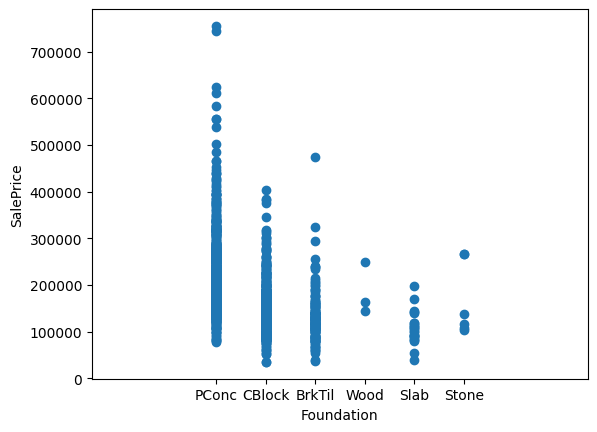

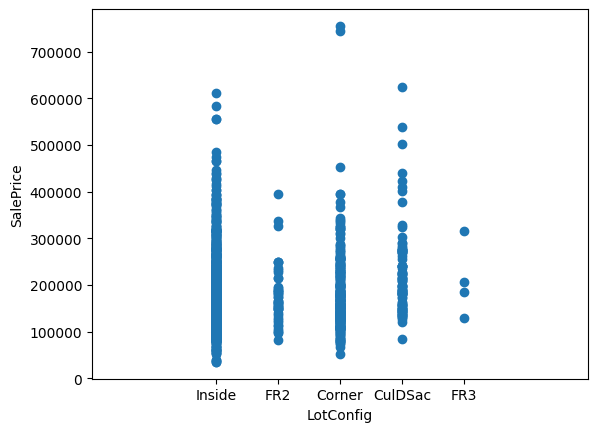

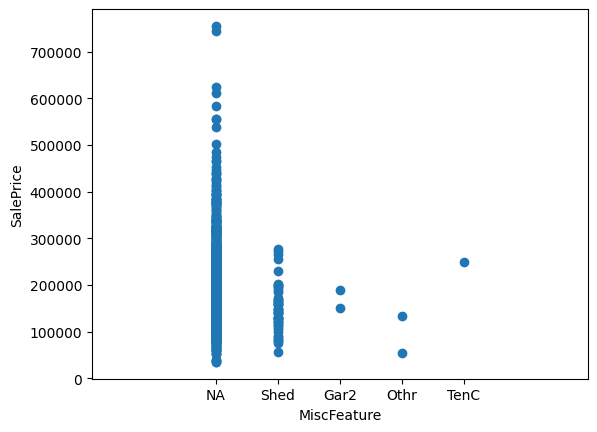

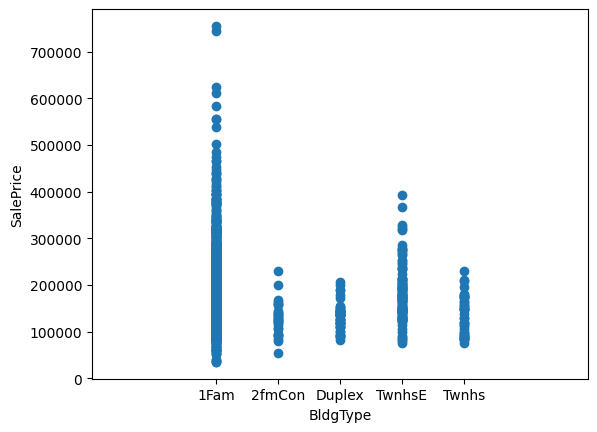

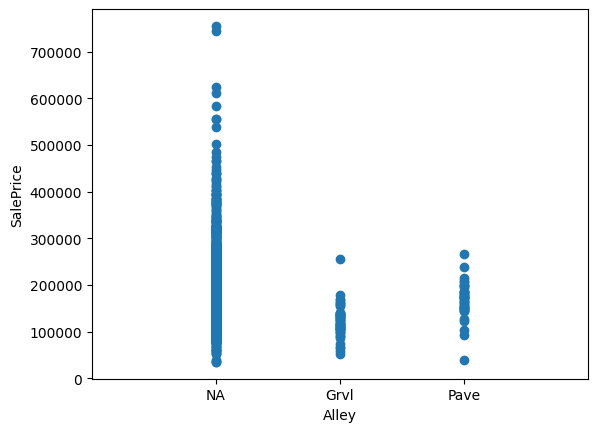

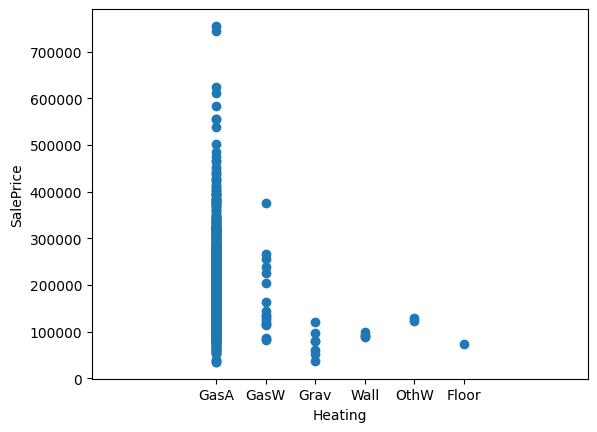

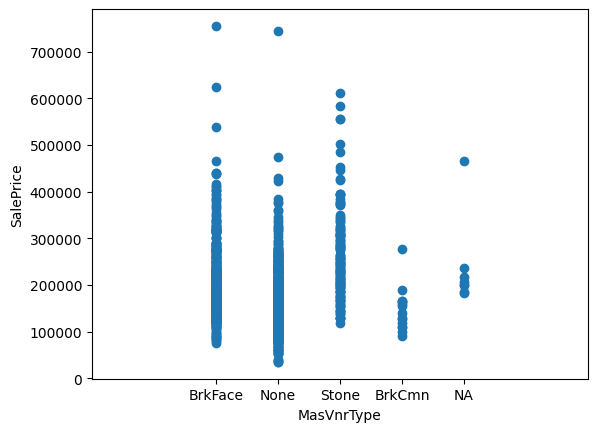

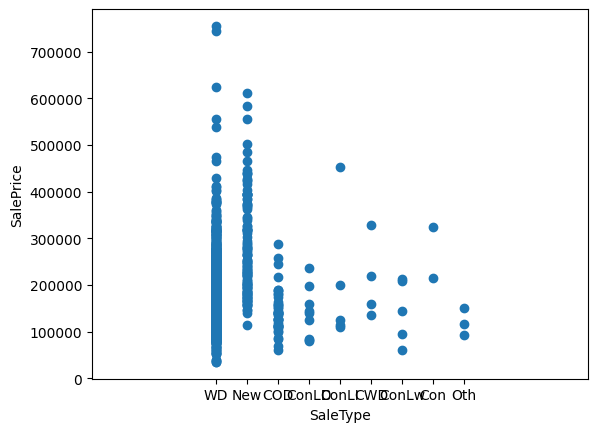

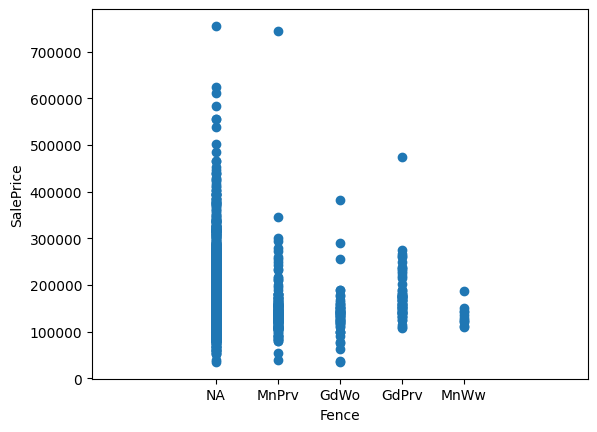

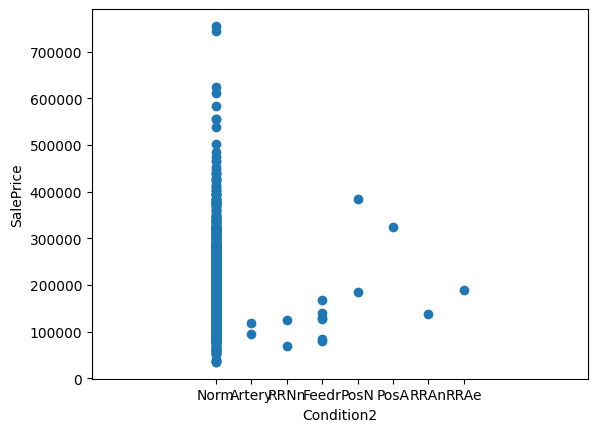

In [ ]:
for col in cat_cols:
  df_plot = pd.DataFrame({"x" : df[col],
                    "y" : df['SalePrice']})

  plt.scatter(df_plot["x"].astype(str), df_plot["y"])
  plt.xlabel(f"{col}")
  plt.ylabel("SalePrice")
  plt.margins(x=0.5)
  plt.show()
  print("=============================================")

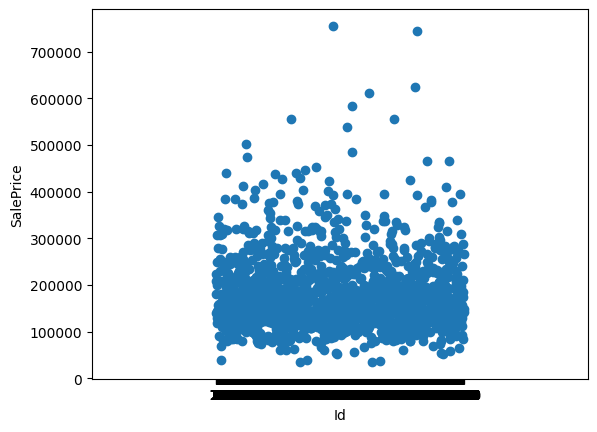

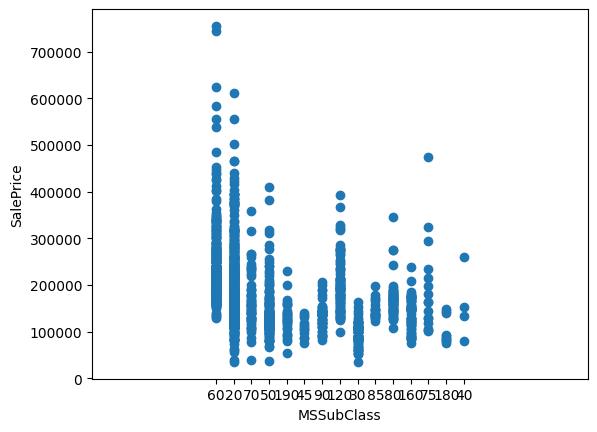

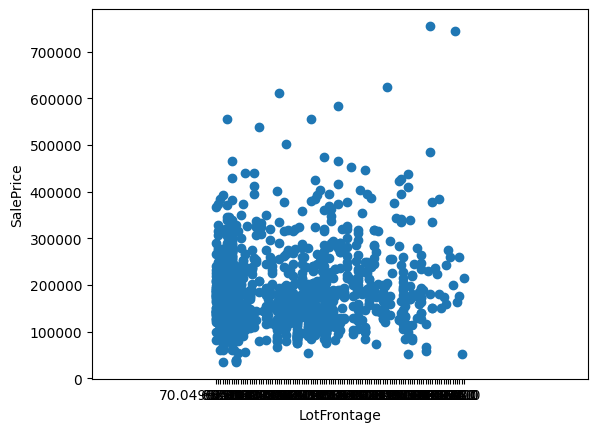

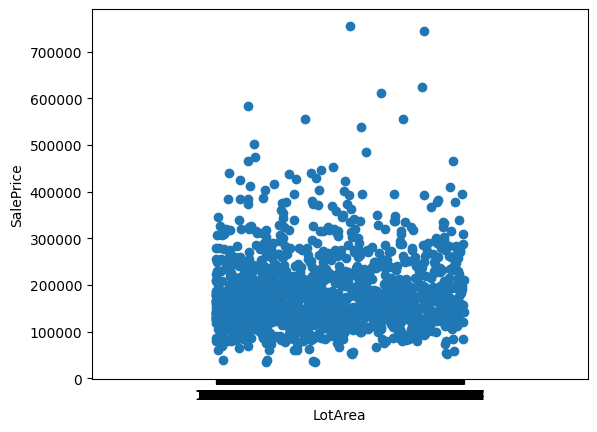

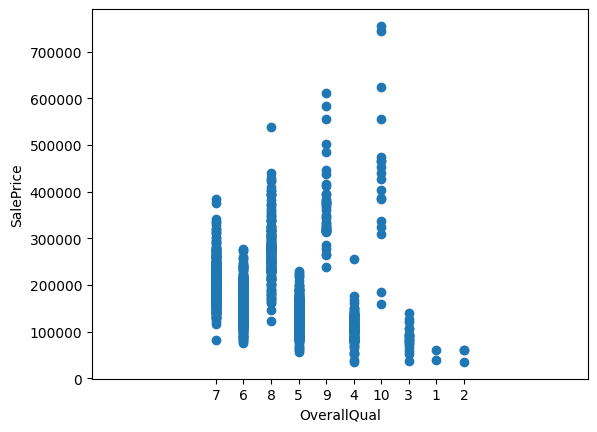

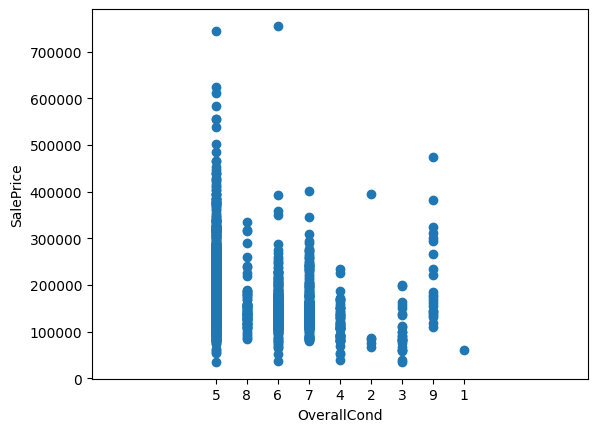

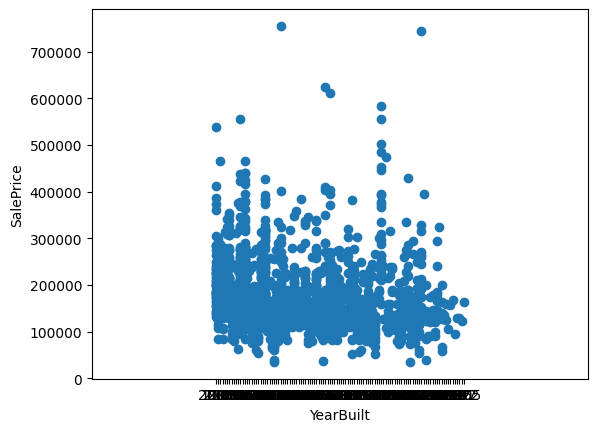

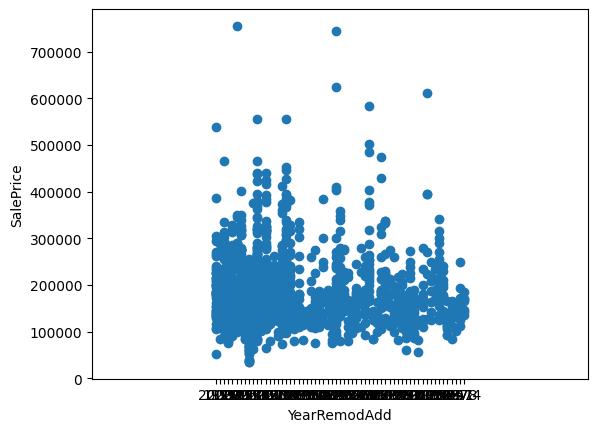

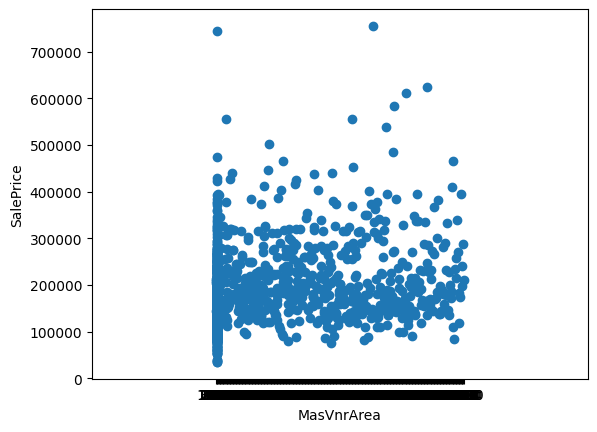

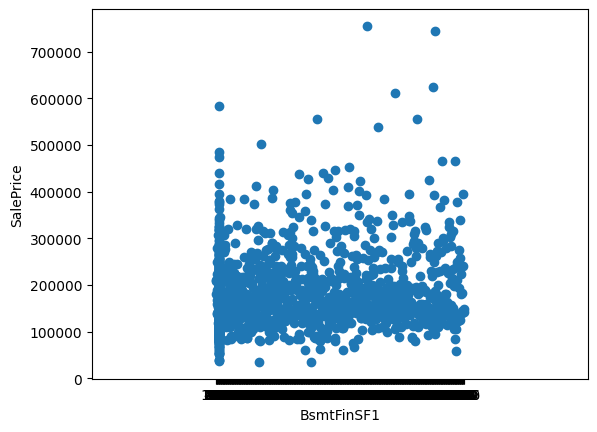

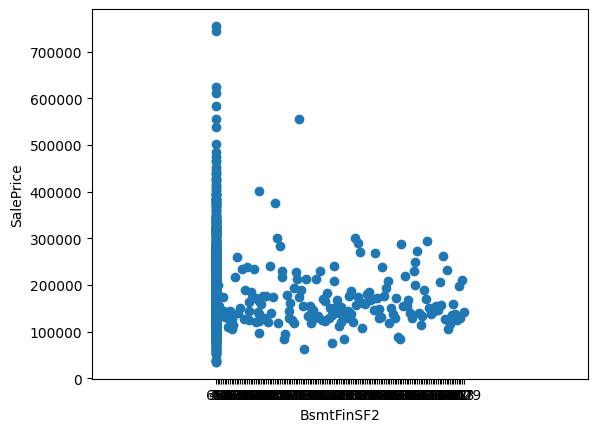

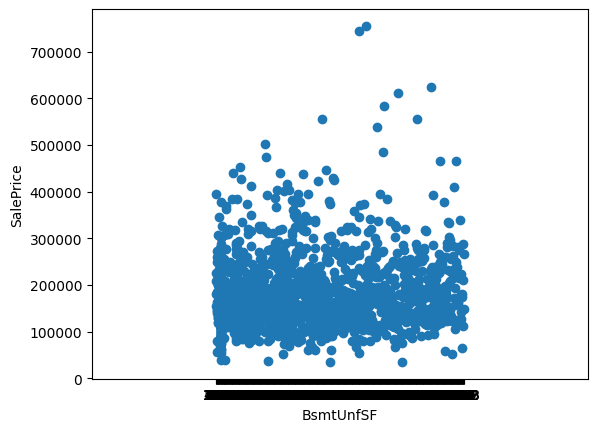

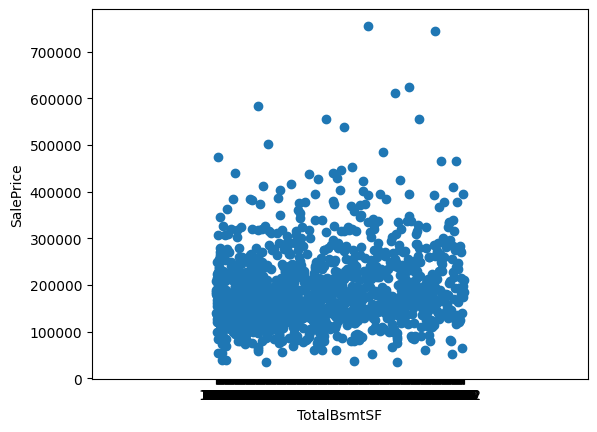

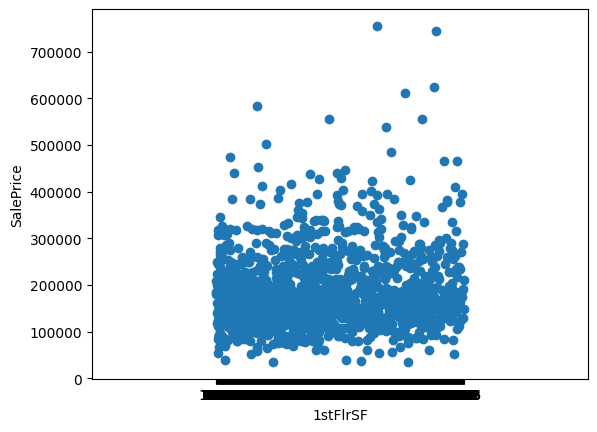

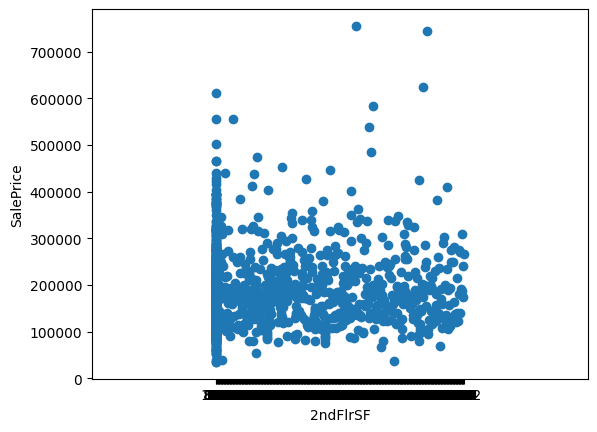

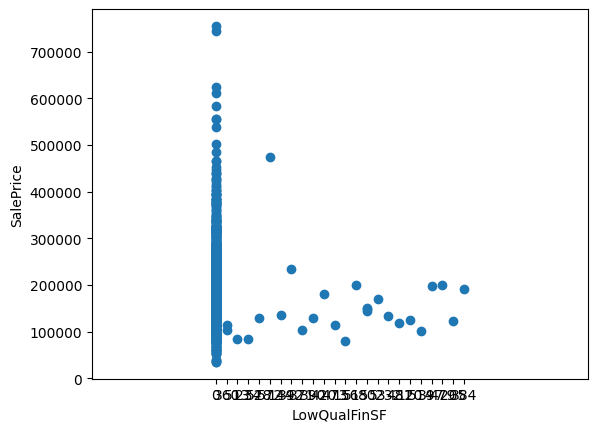

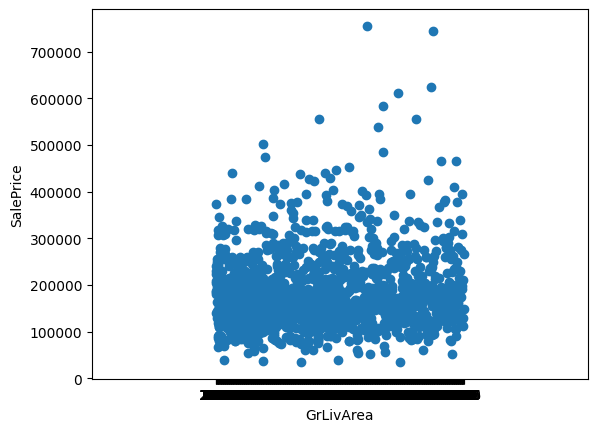

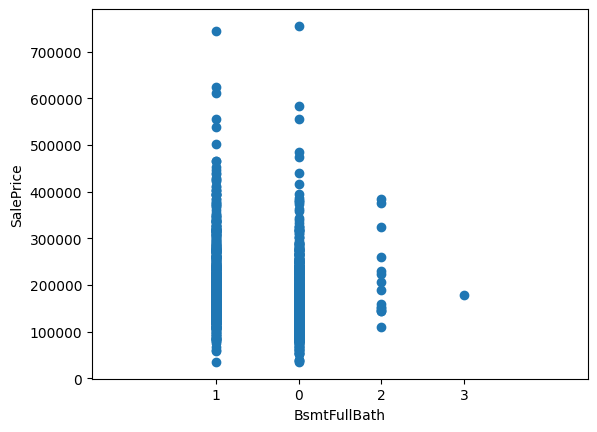

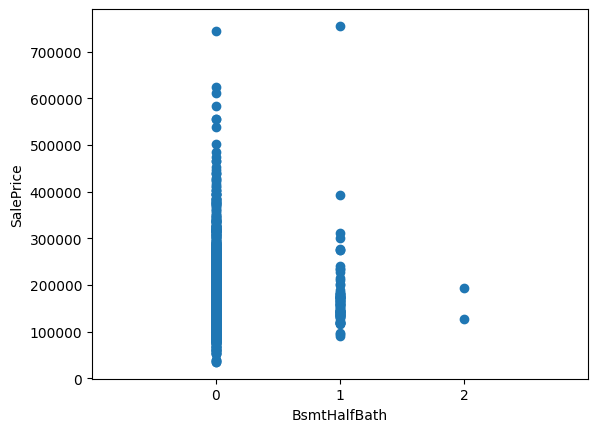

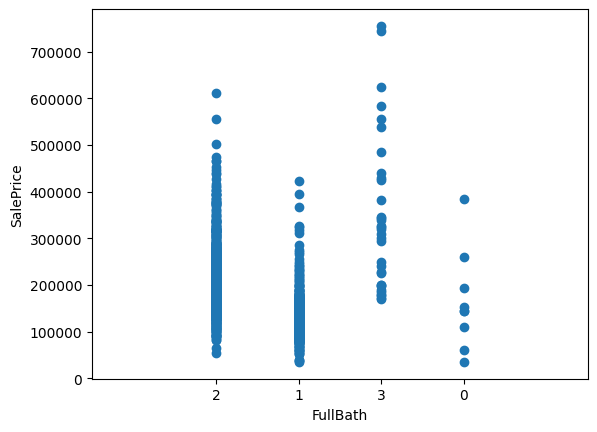

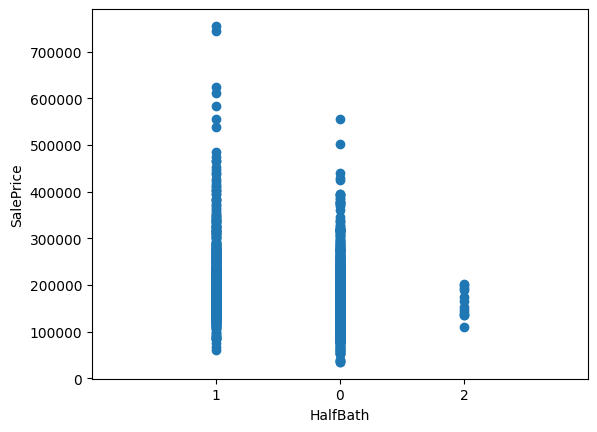

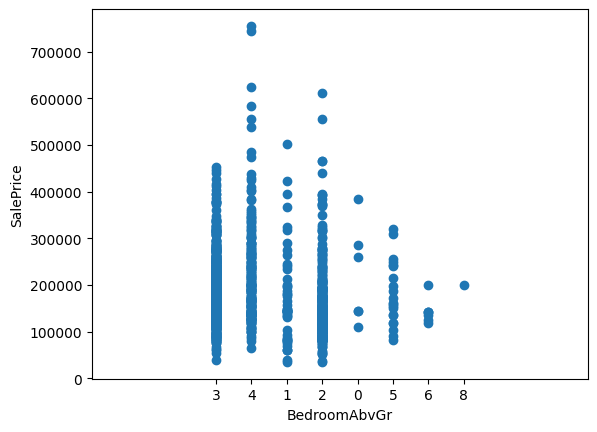

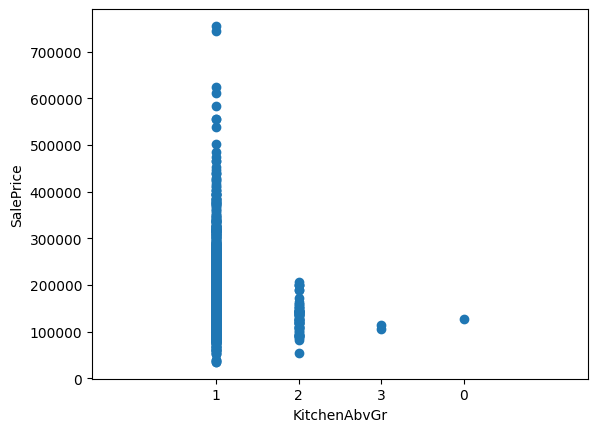

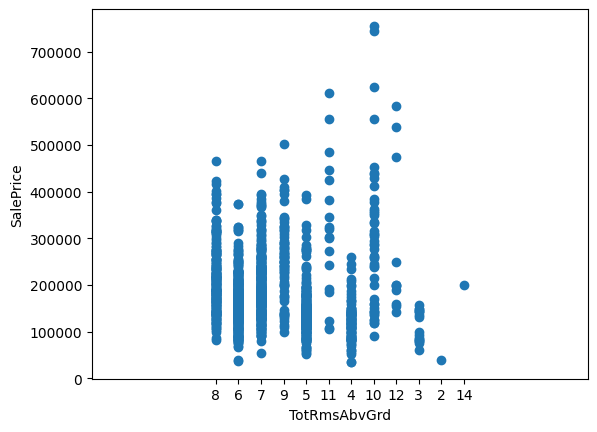

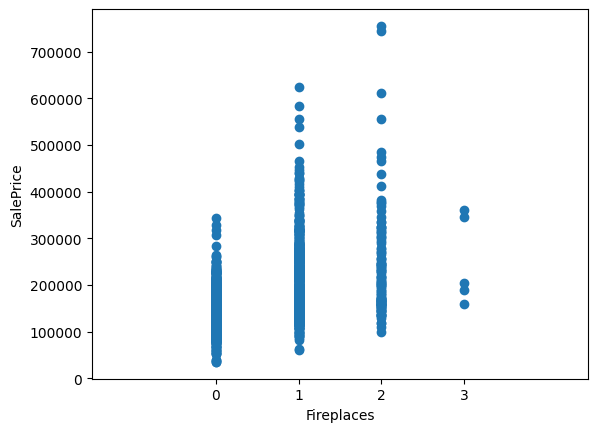

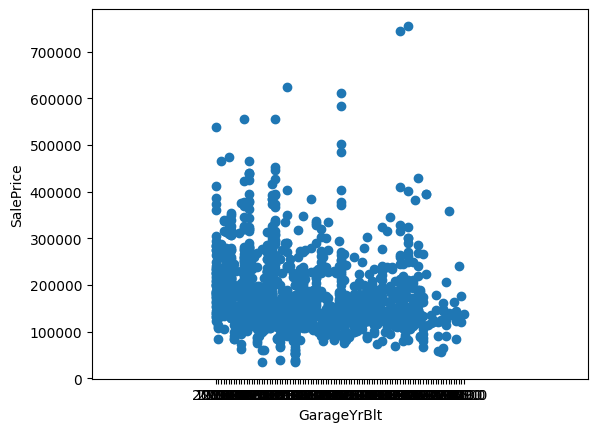

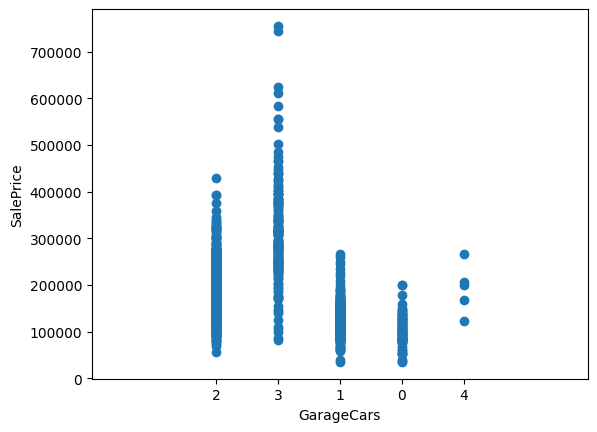

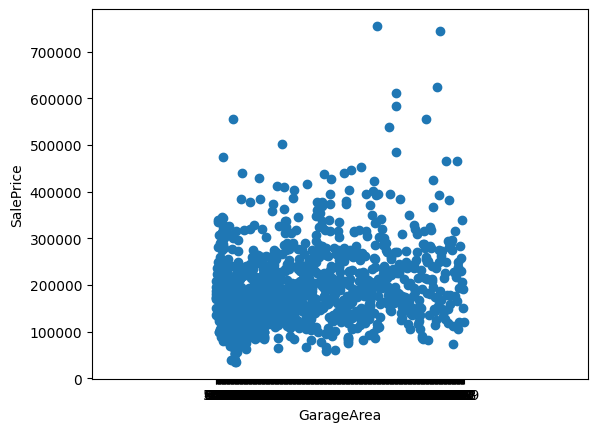

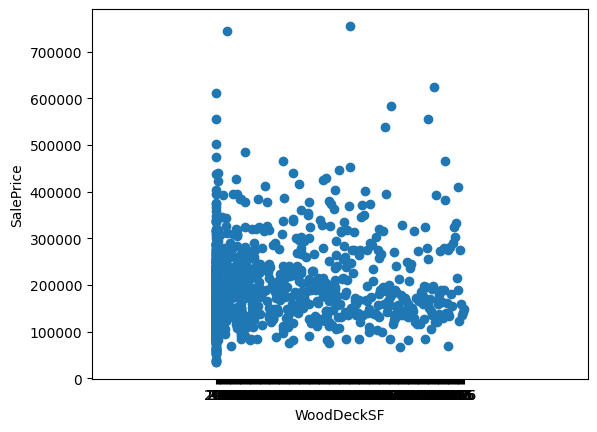

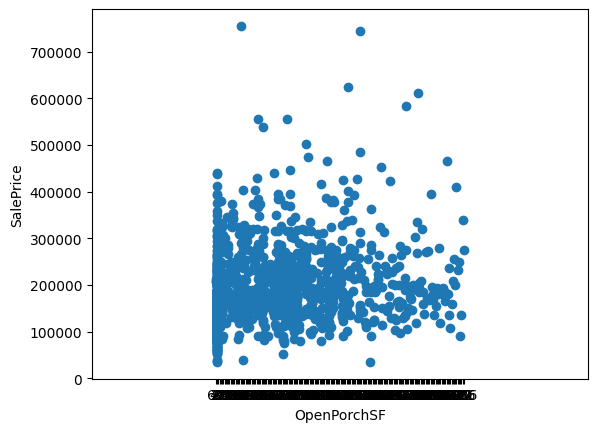

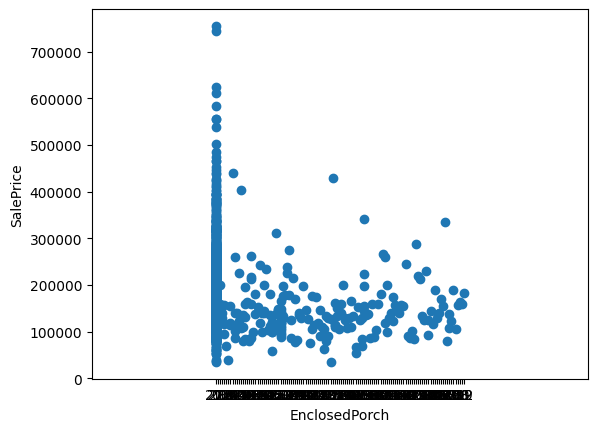

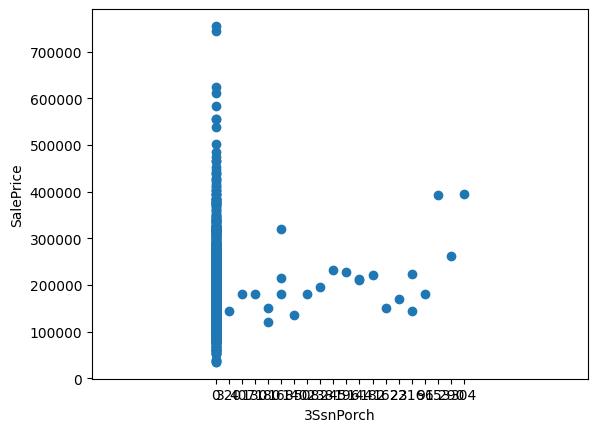

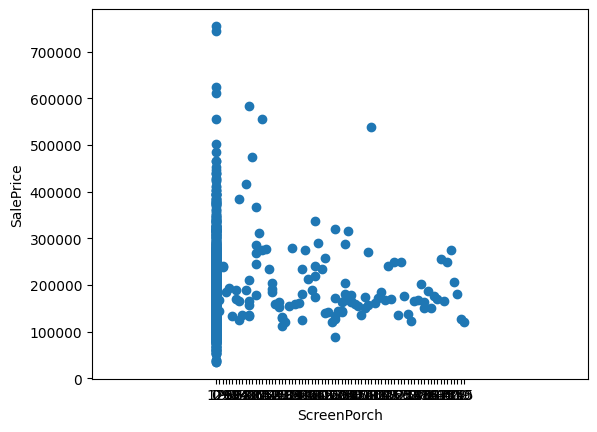

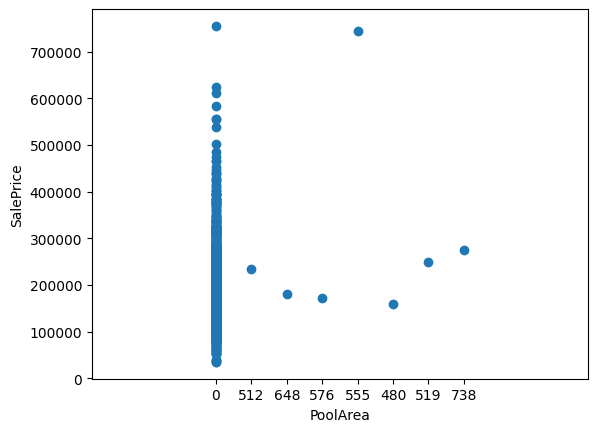

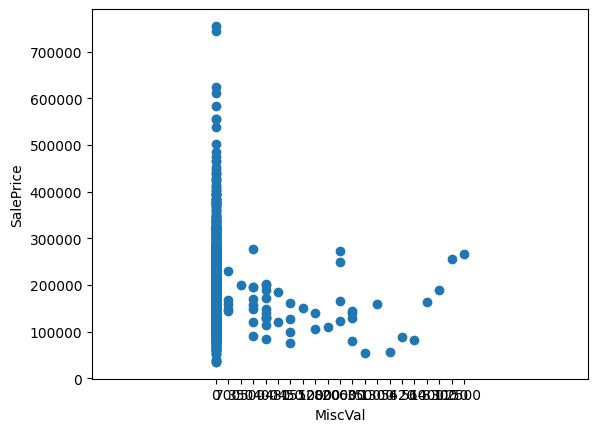

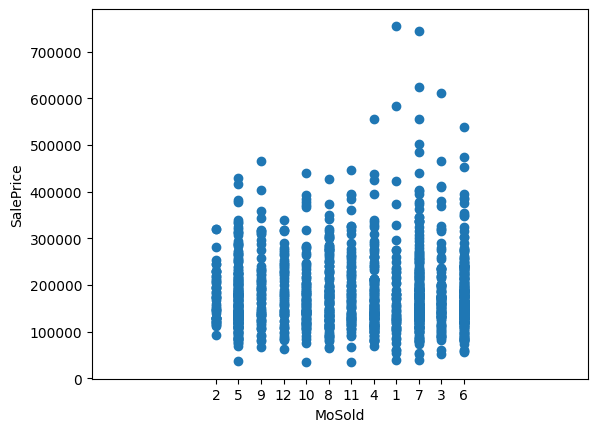

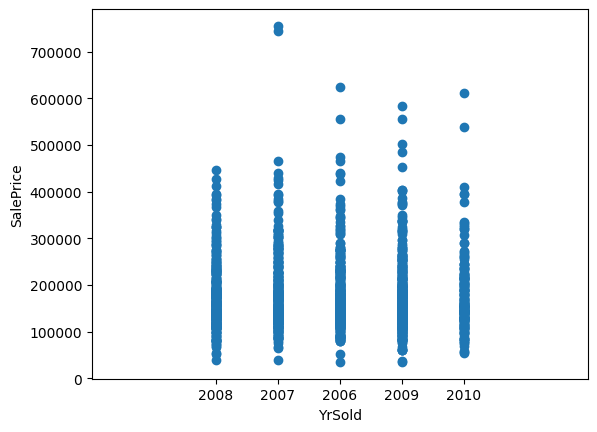

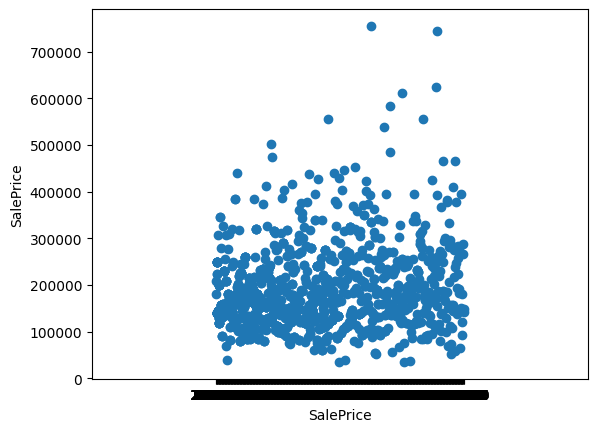

In [ ]:
for col in num_cols:
  df_plot = pd.DataFrame({"x" : df[col],
                    "y" : df['SalePrice']})

  plt.scatter(df_plot["x"].astype(str), df_plot["y"])
  plt.xlabel(f"{col}")
  plt.ylabel("SalePrice")
  plt.margins(x=0.5)
  plt.show()

<ipython-input-18-811f1a0693ff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data_train.corr(), annot= True)


<Axes: >

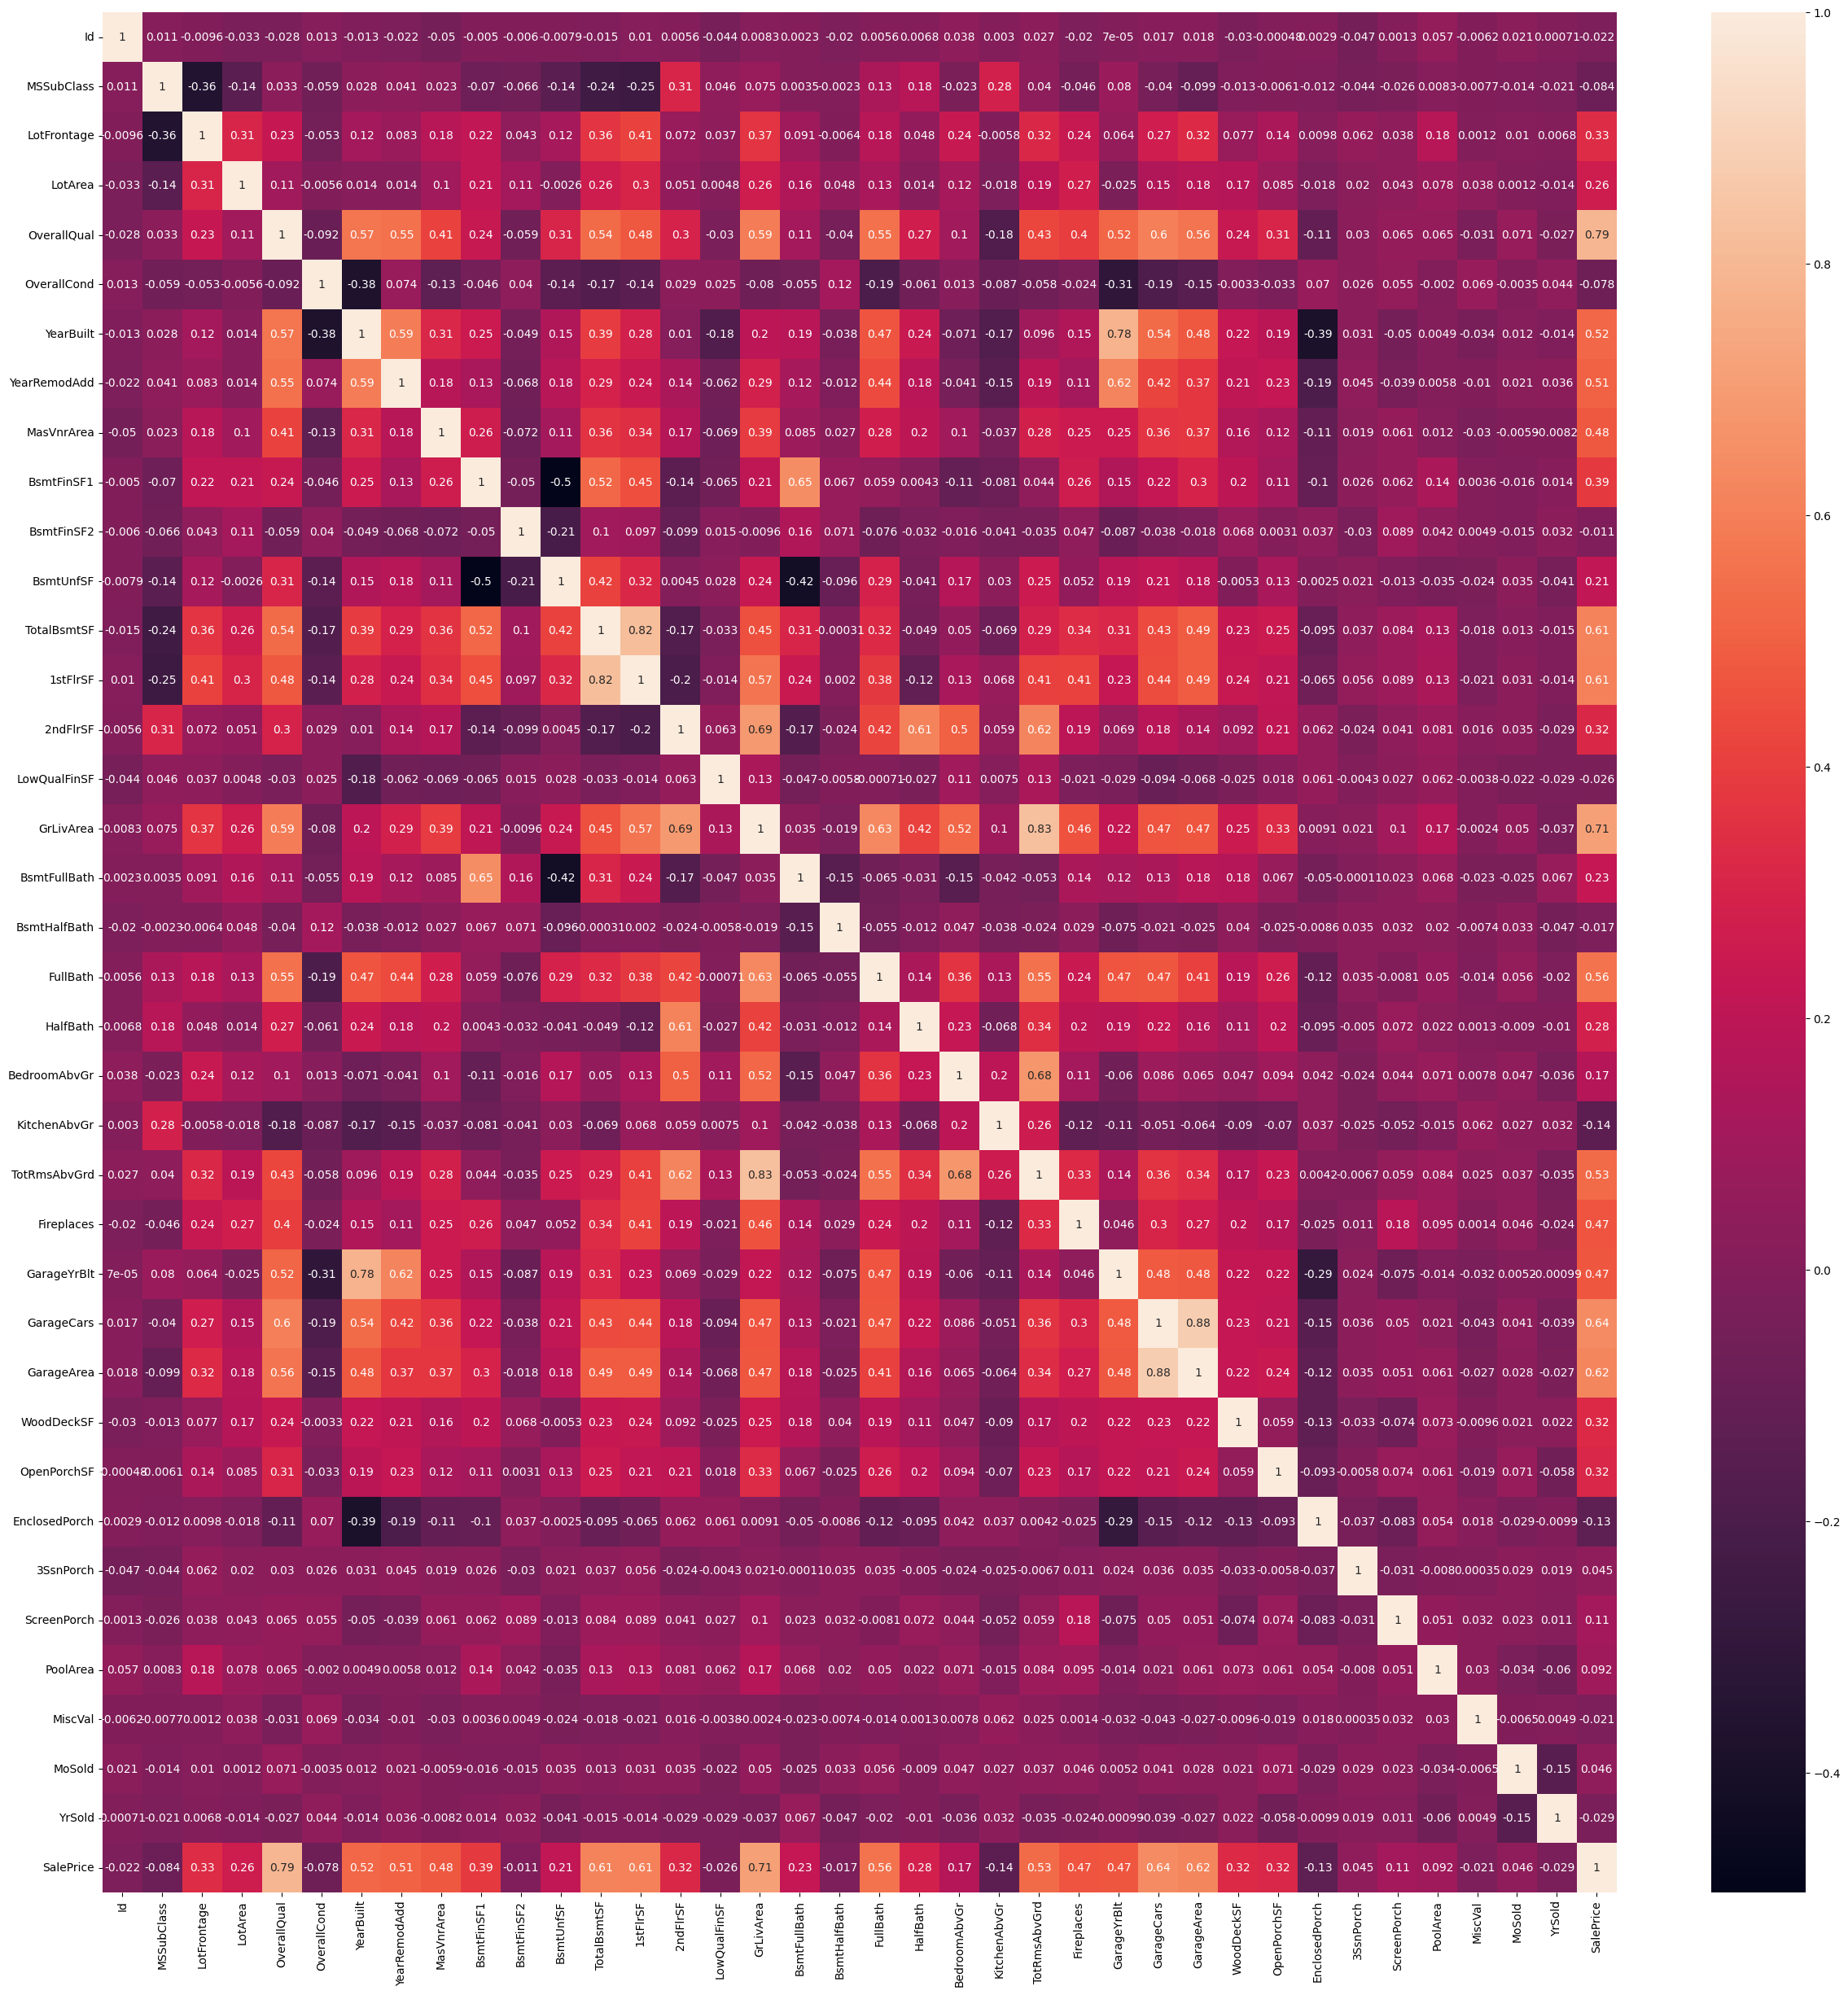

In [ ]:
#Heatmap of correlations, important observations are of final column (far right) and bottom row, which represent sale price correlation with all other columns
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(raw_data_train.corr(), annot= True)

In [ ]:
#Filtering for correlations > |0.4| to determine impactful columns
correlation = df.corr()['SalePrice']
filtered_correlation = correlation.where(((correlation > 0.4) | (correlation < -0.4)) & correlation != np.NaN)
filtered_correlation


<ipython-input-156-fa04aad86e05>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['SalePrice']


Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [ ]:
#Extending filtering to correlations > |0.3| to find more impactful columns
correlation = df.corr()['SalePrice']
filtered_correlation = correlation.where(((correlation > 0.3) | (correlation < -0.3)) & correlation != np.NaN)
filtered_correlation


<ipython-input-157-b1332b60c91f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['SalePrice']


Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [ ]:
#All numerical correlations above 0.4 or below -0.4
num_cols_final = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
                 'Fireplaces', 'GarageCars', 'GarageArea']

#Eyeball test based on graphs - for categorical values
cat_cols_final =  ['Electrical', 'Street', 'Neighborhood', 'Condition1', 'SaleCondition'
, 'CentralAir', 'BsmtQual', 'HouseStyle', 'Alley', 'RoofStyle', 'GarageType'
, 'BldgType', 'MSZoning', 'Foundation', 'Fence', 'PavedDrive']


final_cols = num_cols_final+cat_cols_final


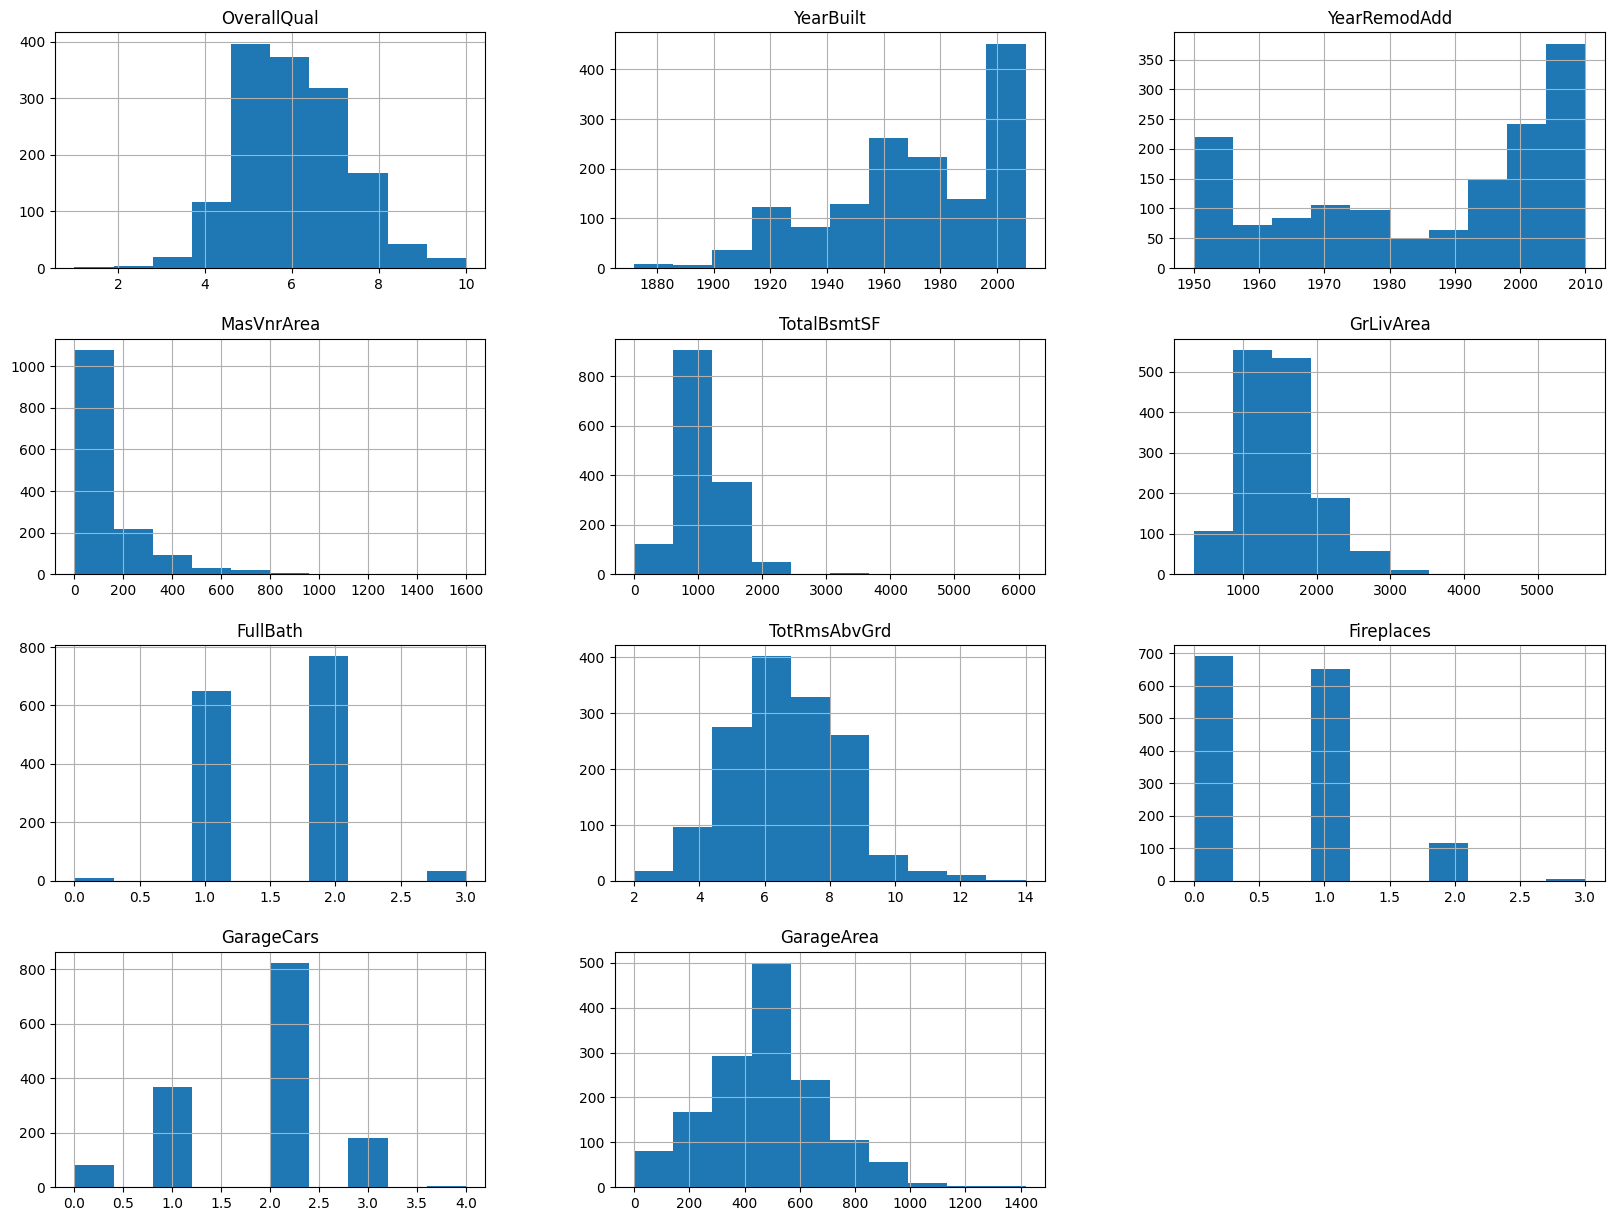

In [ ]:
df[final_cols].hist(figsize=(20,15));

# Linear Regression Preprocessing

In [ ]:
# encodes categorical columns
encoded_cols = pd.get_dummies(raw_data_train[cat_cols_final])
df_encoded = pd.concat([raw_data_train[num_cols_final], encoded_cols], axis=1)


# Linear Regression Model - Testing


In [ ]:
reg = LinearRegression()
X = df_encoded
Y = raw_data_train['SalePrice']
reg.fit(X,Y)

#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
reg.fit(X_train,Y_train)

# Predictions on training and testing sets
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

#print results
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  %np.mean((Y_train - pred_train) **2) )
print(f"The mean absolute percentage error for the Y_train is "+ str(sklearn.metrics.mean_absolute_percentage_error(y_true = Y_train, y_pred = pred_train)))
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) **2) )
print(f"The mean absolute percentage error for the Y_test is "+ str(sklearn.metrics.mean_absolute_percentage_error(y_true = Y_test, y_pred = pred_test)))
print("")

reg.coef_

Fit a model X_train, and calculate MSE with Y_train: 925506158.63
The mean absolute percentage error for the Y_train is 0.10929026287049866
Fit a model X_train, and calculate MSE with X_test and Y_test: 1081057286.66
The mean absolute percentage error for the Y_test is 0.12106427306445762



array([ 1.21251157e+04,  2.35595168e+01,  2.55635637e+02,  1.14654455e+01,
        2.72280958e+00,  4.69638115e+01,  1.94502710e+03,  7.70646392e+02,
        9.19430910e+03,  1.40423324e+04,  4.34437910e+00,  5.42206553e+03,
        2.02963008e+03, -2.10797149e+03, -1.78397761e+04,  6.48560649e+03,
        6.01044549e+03,  1.60279012e+03, -1.60279012e+03, -8.46245901e+03,
        5.96719765e+03,  2.10049234e+03, -9.85528235e+03,  4.48286732e+03,
       -2.50573182e+03,  1.00403303e+04, -2.46185930e+04, -1.28584248e+04,
       -1.43490028e+04, -4.58948239e+02, -1.81979968e+04, -1.61984962e+04,
       -7.13769387e+02, -2.02249066e+04,  4.09636643e+04,  3.62656118e+04,
       -2.11419166e+04, -2.07851022e+04, -1.55804273e+04, -6.90341246e+03,
        1.13606350e+04,  5.42880018e+04, -4.39301682e+03,  3.17786860e+04,
       -8.72765906e+02, -9.74644935e+03,  5.11204492e+03,  1.77237630e+04,
       -1.06413608e+04, -1.08509989e+04,  2.79538437e+03,  6.85328414e+03,
       -3.72901479e+02, -

# Linear Regression Model - Final

Train on the entire dataset such that all values show up for categorical values - necessary for one hot encoding

In [ ]:
reg = LinearRegression()
X = df_encoded
Y = raw_data_train['SalePrice']
reg.fit(X,Y)

LinearRegression()

In [ ]:
import joblib
joblib.dump(reg, 'model.pkl')

['model.pkl']

# Create Streamlit App & Interface

In [ ]:
!pip install -q streamlit
!npm install localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 18.8 MB/s eta 0:00:00
npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.

In [ ]:
%%writefile app.py
import streamlit as st
import csv
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import urllib
import joblib
import pickle

#============================================ Pulling in Raw Data ======================================================================================
df = pd.read_csv('https://raw.githubusercontent.com/jmpark0808/pl_mnist_example/main/train_hp_msci436.csv')
cols = df.columns
unwanted_cols = ['LotShape', 'LandContour', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
                'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinF1', 'BsmtFinSF2', 'HeatingQC', 'LowQualFinSF',
                'KitchenQual', 'Functional', 'GarageQual', 'GarageCond']
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols)-set(unwanted_cols))
df[cat_cols] = df[cat_cols].fillna('NA')
df[num_cols] = df[num_cols].fillna(df.mean())

#============================================ The Streamlit App ======================================================================================

#header
st.header('*House Pricing Predictor* :house_with_garden:')

st.write('Please fill out all parameters before calculating prediction value. Button is only available after going through all tabs.')
tab0, tab1, tab2, tab3, tab4 = st.tabs(['Overview', 'Neighbourhood', 'Exterior', 'Interior', 'Outside Additions'])

with tab0:
    line_chart_df=df.groupby('Neighborhood', as_index=False)['SalePrice'].mean()
    st.write('Average Sale Price In Each Neighbourhood')
    st.bar_chart(line_chart_df, x='Neighborhood', y='SalePrice')

    st.write('Sale Price v.s. Square Footage')
    living_are_chart_df=df[['GrLivArea','SalePrice']].rename(columns={"GrLivArea": "Square Footage", "SalePrice": "Sale Price ($)"})
    st.line_chart(living_are_chart_df, x='Square Footage', y='Sale Price ($)')

with tab1:
  #MSZoning: Identifies the general zoning classification of the sale.
  zoning = st.selectbox('General Zoning Classification', ['Commercial', 'Floating Village Residential'
  , 'Residential High Density', 'Residential Medium Density', 'Residential Low Density'])

  zoning_codes = [ 'Commercial', 'C (all)', 'Floating Village Residential', 'FV'
  , 'Residential High Density', 'RH', 'Residential Medium Density', 'RM', 'Residential Low Density', 'RL']

  for idx, i in enumerate(zoning_codes):
    if zoning == i:
      zoning = zoning_codes[idx+1]
      break

  #Street: Type of road access to property
  street = st.radio('Type of Road Access to property', ['Gravel', 'Paved'])

  street_codes = ['Gravel', 'Grvl', 'Paved', 'Pave']

  for idx, i in enumerate(street_codes):
    if street == i:
      street = street_codes[idx+1]
      break

  #Alley: Type of alley access to property
  alley = st.radio('Type of Alley Access to property', ['Gravel', 'Paved', 'No Alley Access'])

  alley_codes = ['Gravel', 'Grvl', 'Paved', 'Pave', 'No Alley Access', 'NA']

  for idx, i in enumerate(alley_codes):
    if alley == i:
      alley = alley_codes[idx+1]
      break

  #Neighborhood: Physical locations within Ames city limits
  neighbourhood = st.selectbox('Neighbourhood', ['Bloomington Heights', 'Bluestem', 'Briardale', 'Brookside'
  , 'Clear Creek', 'College Creek', 'Crawford', 'Edwards', 'Gilbert', 'Iowa DOT and Rail Road', 'Meadow Village', 'Mitchell', 'North Ames'
  , 'Northridge', 'Northpark Villa', 'Northridge Heights', 'Northwest Ames', 'Old Town', 'South & West of Iowa State University', 'Sawyer'
  , 'Sawyer West', 'Somerset', 'Stone Brook', 'Timberland', 'Veenker'])

  neighbourhood_codes = ['Bloomington Heights', 'Blmngtn', 'Bluestem', 'Blueste', 'Briardale', 'BrDale', 'Brookside', 'BrkSide'
  , 'Clear Creek', 'ClearCr', 'College Creek', 'CollgCr', 'Crawford', 'Crawfor', 'Edwards', 'Edwards', 'Gilbert', 'Gilbert', 'Iowa DOT and Rail Road', 'IDOTRR', 'Meadow Village', 'MeadowV'
  , 'Mitchell', 'Mitchel', 'North Ames', 'Names', 'Northridge', 'NoRidge', 'Northpark Villa', 'NPkVill', 'Northridge Heights', 'NridgHt', 'Northwest Ames', 'NWAmes', 'Old Town', 'OldTown'
  , 'South & West of Iowa State University', 'SWISU', 'Sawyer', 'Sawyer', 'Sawyer West', 'SawyerW', 'Somerset', 'Somerst', 'Stone Brook', 'StoneBr', 'Timberland', 'Timber', 'Veenker', 'Veenker']

  for idx, i in enumerate(neighbourhood_codes):
    if neighbourhood == i:
      neighbourhood = neighbourhood_codes[idx+1]
      break

  #Condition1: Proximity to various conditions
  cond1 = st.selectbox('Unique Condition in proximity of building, normal if none', ['Normal', 'Adjacent to arterial street', 'Adjacent to feeder street'
  , 'Near positive off-site feature--park, greenbelt, etc.', 'Adjacent to postive off-site feature', 'Within 200\' of North-South Railroad', 'Adjacent to North-South Railroad'
  , 'Within 200\' of East-West Railroad', 'Adjacent to East-West Railroad'])

  cond1_codes = ['Normal', 'Norm', 'Adjacent to arterial street', 'Artery', 'Adjacent to feeder street', 'Feedr', 'Near positive off-site feature--park, greenbelt, etc.', 'PosN', 'Adjacent to postive off-site feature', 'PosA'
  , 'Within 200\' of North-South Railroad', 'RRNn', 'Adjacent to North-South Railroad', 'RRAn'
  , 'Within 200\' of East-West Railroad', 'RRNe', 'Adjacent to East-West Railroad', 'RRAe']

  for idx, i in enumerate(cond1_codes):
    if cond1 == i:
      cond1 = cond1_codes[idx+1]
      break

with tab2:
  #BldgType: Type of dwelling
  bldgType = st.selectbox('Type of Dwelling', ['Single-family Detached','Two-family Conversion; originally a one-family dwelling','Duplex','Townhouse End Unit','Townhouse Inside Unit'])

  bldgType_codes = ['Single-family Detached', '1Fam','Two-family Conversion; originally a one-family dwelling', '2fmCon','Duplex', 'Duplex','Townhouse End Unit', 'TwnhsE','Townhouse Inside Unit', 'Twnhs']

  for idx, i in enumerate(bldgType_codes):
    if bldgType == i:
      bldgType = bldgType_codes[idx+1]
      break

  #HouseStyle: Style of dwelling
  style = st.selectbox('Style of Dwelling', ['One story','One and one-half story: 2nd level finished','One and one-half story: 2nd level unfinished','Two story'
  ,'Two and one-half story: 2nd level finished','Two and one-half story: 2nd level unfinished','Split Foyer','Split Level'])

  style_codes = ['One story', '1Story','One and one-half story: 2nd level finished', '1.5Fin','One and one-half story: 2nd level unfinished', '1.5Unf','Two story', '2Story'
  ,'Two and one-half story: 2nd level finished', '2.5Fin','Two and one-half story: 2nd level unfinished', '2.5Unf','Split Foyer', 'SFoyer','Split Level', 'SLvl']

  for idx, i in enumerate(style_codes):
    if style == i:
      style = style_codes[idx+1]
      break

  #OverallQual: Rates the overall material and finish of the house (Might cut cuz subjective)
  qual = st.slider('Rate the overall quality of the Material and Finish of the building (10 = Very Excellent, 1 = Very Poor)', 1,10)

  #YearBuilt: Orig construction date (Can change to number box if we are trying to error proof)
  year = st.text_input('Original Construction Date')

  #YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
  yearRemod = st.text_input('Remodel Date (same as construction date if no remodeling or additions).')

  #RoofStyle: Type of roof
  roof = st.selectbox('Type of Roof', ['Flat','Gable','Gambrel (Barn)','Hip','Mansard','Shed'])

  roof_codes = ['Flat', 'Flat','Gable','Gable','Gambrel (Barn)', 'Gambrel', 'Hip','Hip','Mansard','Mansard','Shed','Shed']

  for idx, i in enumerate(roof_codes):
    if roof == i:
      roof = roof_codes[idx+1]
      break

  #MasVnrArea: Masonry veneer area in square feet
  masonArea = st.text_input('Masonry Veneer Area in square feet')

  #Foundation: Type fo Foundation
  foundation = st.selectbox('Type of Foundation', ['Brick & Tile','Cinder Block','Poured Concrete','Slab','Stone','Wood'])

  foundation_codes = ['Brick & Tile', 'BrkTil','Cinder Block', 'CBlock','Poured Concrete','PConc','Slab','Slab','Stone','Stone','Wood','Wood']

  for idx, i in enumerate(foundation_codes):
    if foundation == i:
      foundation = foundation_codes[idx+1]
      break

with tab3:
  #BsmtQual: Evaluates the height of the basement
  baseQual = st.radio('Height of the Basement', ['No Basement','Excellent (100+ inches)','Good (90-99 inches)','Typical (80-89 inches)','Fair (70-79 inches)'])

  baseQual_codes = ['No Basement', 'NA','Excellent (100+ inches)','Ex','Good (90-99 inches)','Gd','Typical (80-89 inches)','TA','Fair (70-79 inches)','Fa']

  for idx, i in enumerate(baseQual_codes):
    if baseQual == i:
      baseQual = baseQual_codes[idx+1]
      break

  #TotalBsmtSF: Total square feet of basement area
  baseSF = st.text_input('Total square feet of Basement Area')

  #CentralAir: Central air conditioning
  ac = st.radio('Is there Central Air Conditioning?', ['No', 'Yes'])

  ac_codes = ['No', 'N', 'Yes', 'Y']

  for idx, i in enumerate(ac_codes):
    if ac == i:
      ac = ac_codes[idx+1]
      break

  #Electrical: Electrical system
  elec = st.selectbox('Type of Electrical System', ['None', 'Standard Circuit Breakers & Romex','Fuse Box over 60 AMP and all Romex wiring (Average)','60 AMP Fuse Box and mostly Romex wiring (Fair)'
  ,'60 AMP Fuse Box and mostly knob & tube wiring (poor)','Mixed'])

  elec_codes = ['None', 'NA', 'Standard Circuit Breakers & Romex','SBrkr','Fuse Box over 60 AMP and all Romex wiring (Average)','FuseA','60 AMP Fuse Box and mostly Romex wiring (Fair)','FuseF'
  ,'60 AMP Fuse Box and mostly knob & tube wiring (poor)','FuseP','Mixed','Mix']

  for idx, i in enumerate(elec_codes):
    if elec == i:
      elec = elec_codes[idx+1]
      break

  #GrLivArea: Above grade (ground) living area square feet
  livingArea = st.text_input('Above Grade(ground) Living Area square feet')

  #FullBath: Full bathrooms above grade
  bath = st.text_input('Full Bathrooms Above Grade')

  #TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
  roomTot = st.text_input('Total Rooms Above Grade (does not include bathrooms)')

  #Fireplaces: Number of fireplaces
  fireplaces = st.text_input('Number of Fireplaces')

with tab4:
  #GarageType: Garage location
  garageType = st.selectbox('Type of Garage', ['No garage','More than one type of garage','Attached to home','Basement Garage','Built-In (Garage part of house - typically has room above garage)'
  ,'Car Port','Detached from home'])

  garageType_codes = ['No garage','NA','More than one type of garage','2Types','Attached to home','Attchd','Basement Garage','Basment','Built-In (Garage part of house - typically has room above garage)','BuiltIn'
  ,'Car Port','CarPort','Detached from home','Detchd']

  for idx, i in enumerate(garageType_codes):
    if garageType == i:
      garageType = garageType_codes[idx+1]
      break

  #GarageCars: Size of garage in car capacity
  garageCars = st.text_input('Size of Garage in car capacity')

  #GarageArea: Size of garage in square feet
  garageArea = st.text_input('Size of Garage in square feet')

  #PavedDrive: Paved driveway
  driveway = st.radio('Type of Paved Driveway', ['Paved','Partial Pavement','Dirt/Gravel'])

  driveway_codes = ['Paved','Y','Partial Pavement','P','Dirt/Gravel','N']

  for idx, i in enumerate(driveway_codes):
    if driveway == i:
      driveway = driveway_codes[idx+1]
      break

  #Fence: Fence quality
  fence = st.radio('Fence Quality', ['No Fence','Good Privacy','Minimum Privacy','Good Wood','Minimum Wood/Wire'])

  fence_codes = ['No Fence','NA','Good Privacy','GdPrv','Minimum Privacy','MnPrv','Good Wood','GdWo','Minimum Wood/Wire','MnWw']

  for idx, i in enumerate(fence_codes):
    if fence == i:
      fence = fence_codes[idx+1]
      break

  #SaleCondition: Condition of sale
  sale = st.selectbox('Condition of Sale', ['Normal Sale','Abnormal Sale -  trade, foreclosure, short sale','Adjoining Land Purchase','Allocation - two linked properties with separate deeds, typically condo with a garage unit'
  ,'Sale between family members','Home was not completed when last assessed (associated with New Homes)'])

  sale_codes = ['Normal Sale','Normal','Abnormal Sale -  trade, foreclosure, short sale','Abnorml','Adjoining Land Purchase','AdjLand','Allocation - two linked properties with separate deeds, typically condo with a garage unit','Alloca'
  ,'Sale between family members','Family','Home was not completed when last assessed (associated with New Homes)','Partial']

  for idx, i in enumerate(sale_codes):
    if sale == i:
      sale = sale_codes[idx+1]
      break

  #Calculate button

  if st.button('Calculate property value estimation'):
    #store all collected data in a csv for predictions
    with open('userentry.csv', 'w') as file:
      writer = csv.writer(file)


    A = ['MSZoning', 'Street', 'Alley', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'Foundation'
      , 'BsmtQual', 'TotalBsmtSF', 'CentralAir', 'Electrical', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageArea', 'PavedDrive', 'Fence', 'SaleCondition']
    B = [zoning, street, alley, neighbourhood, cond1, bldgType, style, qual, year, yearRemod, roof, masonArea, foundation, baseQual, baseSF, ac, elec, livingArea, bath, roomTot, fireplaces, garageType, garageCars, garageArea, driveway, fence, sale]



  #============================================ Declare columns ======================================================================================

    #Outlining columns
    #All numerical correlations above 0.4 or below -0.4
    num_cols_final = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea']

    #Eyeball test based on graphs - for categorical values
    cat_cols_final =  ['Electrical', 'Street', 'Neighborhood', 'Condition1', 'SaleCondition', 'CentralAir', 'BsmtQual', 'HouseStyle', 'Alley', 'RoofStyle', 'GarageType', 'BldgType', 'MSZoning', 'Foundation', 'Fence', 'PavedDrive']

  #============================================ User Data ======================================================================================

    data = {A[i]: B[i] for i in range(len(A))}
    user_input = pd.DataFrame(data, index=[0])

    extra_cat_columns = pd.read_csv('https://raw.githubusercontent.com/ZhiChua/MSCI_436/main/cat_variables.csv')
    pred_df = pd.concat([user_input.reset_index(), extra_cat_columns.reset_index()]).reset_index()

    pred_df[cat_cols_final] = pred_df[cat_cols_final].fillna('NA')
    pred_df[num_cols_final] = pred_df[num_cols_final].fillna(0)

    cat_encoded_cols = pd.get_dummies(pred_df[cat_cols_final])

    pred_encoded_df= pd.concat([pred_df[num_cols_final], cat_encoded_cols], axis=1)



    #========================= LINEAR REGRESSION MODEL =============================================================================================

    encoded_cols = pd.get_dummies(df[cat_cols_final])
    df_encoded = pd.concat([df[num_cols_final], encoded_cols], axis=1)

    reg = LinearRegression()
    X = df_encoded
    Y = df['SalePrice']
    reg.fit(X,Y)

    #Predict the model

    prediction = reg.predict(pred_encoded_df.head(1))

    #Price Estimation
    pred_value = 0
    st.subheader(':moneybag: *Price Estimation* :moneybag:')
    st.write('Based on your inputted parameters, the estimated value of the house is: $', round(prediction[0],2))

    st.write('Current average sale price in the %s neighbourhood: $%s'%(user_input['Neighborhood'].iat[0],round(line_chart_df.query('Neighborhood == "%s"' %(user_input['Neighborhood'].iat[0]))['SalePrice'].iat[0],2)))


Overwriting app.py


# Run app

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!curl ipv4.icanhazip.com
!npx localtunnel --port 8501

34.138.251.244
npx: installed 22 in 3.027s
your url is: https://tiny-forks-mate.loca.lt
^C
